# Cleaning Data

In [4]:
##Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# read excel file 
df = pd.read_excel("data/masterlistmaydata.xlsx")

# delete rows with nan values
df.dropna(how='all', inplace=True) 

# Fill NaN values in the TASK column 
df['TASK'] = df['TASK'].interpolate(method ='pad', limit_direction ='forward')

# to find the dates in the TASK column
dates_in_task_col = df['TASK'].str.contains('---')

# to get indexes of the dates in the TASK column
get_idx = dates_in_task_col[dates_in_task_col == True].index 

# Fill NaN values by copying the dates in the TASK column to DATE column
df['DATE'] = df['TASK'].loc[get_idx].interpolate()

# Fill NaN values in the DATE column
df['DATE'] = df['DATE'].interpolate(method ='pad', limit_direction ='forward')

# delete if any row include nan values
df.dropna(how='any',axis=0, inplace=True)

##  fix typs of dates ##

# delete ' - ' s in 'DATE' columnn
df['DATE'] = df['DATE'].str.strip(' - ')
# delete unnecessary emojies
df['TASK'] = df['TASK'].str.strip(' 📖|📈|📚|✍️|👂|🗣')
# **** #

# find values containing'2022' in DATE column
findY = df['DATE'].str.contains('2022')

# get indexes that are not containing'2022'
getFalse = findY[findY == False].index

# format dates
a = pd.to_datetime(df['DATE'].loc[getFalse], format='%d %B %a')+ pd.offsets.DateOffset(years=123) # this is because formating returns years as 1900 so it adds 123 years to the default value

# update data
df['DATE'].update(a)

# **** #

# get indexes containing'2022'
getTrue = findY[findY == True].index 

# format dates
b =  pd.to_datetime(df['DATE'].loc[getTrue], format='%d %b %Y %a')

# update data
df['DATE'].update(b)

# **** #

# show only dates not times
df['DATE'] = pd.to_datetime(df['DATE']).dt.date 

df.head(10)

,DATE,TASK,NUMBER,START,END,TIME FOCUSED,COMPLETED
4,2023-05-03,Task: DATATHON preparation,03:00:00,18:08:00,19:10:00,Min: 25,✅
5,2023-05-03,Task: DATATHON preparation,02:00:00,17:43:00,18:08:00,Min: 25,✅
9,2023-05-03,Task: Math 154,01:00:00,16:39:00,17:43:00,Min: 18,❌
15,2023-04-30,Task: Math 154,04:00:00,16:13:00,16:38:00,Min: 25,✅
16,2023-04-30,Task: Math 154,03:00:00,15:26:00,15:51:00,Min: 25,✅
17,2023-04-30,Task: Math 154,02:00:00,15:01:00,15:26:00,Min: 25,✅
18,2023-04-30,Task: Math 154,01:00:00,14:34:00,14:59:00,Min: 25,✅
24,2023-04-29,Task: Math 154,16:00:00,20:46:00,21:11:00,Min: 25,✅
25,2023-04-29,Task: Math 154,15:00:00,20:21:00,20:46:00,Min: 25,✅
26,2023-04-29,Task: Math 154,14:00:00,19:35:00,20:11:00,Min: 25,✅


In [5]:
df_copy = df.copy()

df_copy.loc[df_copy['TASK'].str.contains('Ch|ch|CH'), 'TASK'] = 'PHYS 111'
df_copy.loc[df_copy['TASK'].str.contains('153'), 'TASK'] = 'MATH 153'
df_copy.loc[df_copy['TASK'].str.contains('April|March|February|Revision|Eng'), 'TASK'] = 'Eng revision'
df_copy.loc[df_copy['TASK'].str.contains('Py'), 'TASK'] = 'Python'
df_copy.loc[df_copy['TASK'].str.contains('学习中文'), 'TASK'] = 'Chinese'
time_spent = df_copy.groupby(['TASK']).sum()
time_spent.sort_values(by=['TIME FOCUSED'], ascending= False).head(10)

/var/folders/dm/vlb3lrsn2kgg0bxkkw0vb53c0000gn/T/ipykernel_1376/3892856494.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  time_spent = df_copy.groupby(['TASK']).sum()


,TIME FOCUSED,COMPLETED
TASK,,
Task: M116 lessons revison,Min: 7Min: 25Min: 25Min: 25Min: 25Min: 25Min: ...,❌✅✅✅✅✅✅✅✅
Task: setup,Min: 5,❌
Task: IconButton,Min: 4Min: 25,❌✅
Task: zehrakaya.dev,Min: 3,❌
Task: Binary tree,Min: 25Min: 3Min: 25,✅❌✅
Task: Card,Min: 25Min: 25Min: 25Min: 6Min: 25,✅✅✅❌✅
Task: Masterlist analysis,Min: 25Min: 25Min: 25Min: 25Min: 25Min: 25Min:...,✅✅✅✅✅✅✅✅✅✅✅✅❌✅❌✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅
Task: Masterlist cleaning data,Min: 25Min: 25Min: 25Min: 25Min: 25Min: 25Min:...,✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅❌✅✅✅
PHYS 111,Min: 25Min: 25Min: 25Min: 25Min: 25Min: 25Min:...,✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅❌✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅❌✅✅✅✅✅...


In [6]:
checklist = pd.Series(['MATH', 'PHYS','IELTS','English',
               'Drone Simulation','Habbits & Hobbies',
               '中国','game - JavaScript','College Admission', 
               'Chess-Like Game', 'Python Programming','Volunteer Works'])
checklist

0                   MATH
1                   PHYS
2                  IELTS
3                English
4       Drone Simulation
5      Habbits & Hobbies
6                     中国
7      game - JavaScript
8      College Admission
9        Chess-Like Game
10    Python Programming
11       Volunteer Works
dtype: object

In [7]:
df_copy['CHECKLIST'] = np.nan
df_copy

,DATE,TASK,NUMBER,START,END,TIME FOCUSED,COMPLETED,CHECKLIST
4,2023-05-03,Task: DATATHON preparation,03:00:00,18:08:00,19:10:00,Min: 25,✅,NaN
5,2023-05-03,Task: DATATHON preparation,02:00:00,17:43:00,18:08:00,Min: 25,✅,NaN
9,2023-05-03,Task: Math 154,01:00:00,16:39:00,17:43:00,Min: 18,❌,NaN
15,2023-04-30,Task: Math 154,04:00:00,16:13:00,16:38:00,Min: 25,✅,NaN
16,2023-04-30,Task: Math 154,03:00:00,15:26:00,15:51:00,Min: 25,✅,NaN
...,...,...,...,...,...,...,...,...
1438,2023-01-26,Task: House works,03:00:00,15:17:00,15:45:00,Min: 25,✅,NaN
1439,2023-01-26,Task: House works,02:00:00,14:42:00,15:17:00,Min: 12,❌,NaN
1440,2023-01-26,Task: House works,01:00:00,14:03:00,14:29:00,Min: 25,✅,NaN
1446,2023-01-24,Task: Appearance,02:00:00,13:58:00,14:23:00,Min: 25,✅,NaN


In [8]:
df_copy.loc[df_copy['TASK'].str.contains('Py|Numpy|Academy'), 'CHECKLIST'] = checklist[10]


In [9]:
data = df_copy[['TIME FOCUSED', 'TASK', 'DATE']].copy()

# convert the DATE column to Timestamp objects
data['DATE'] = pd.to_datetime(data['DATE'],format='%Y %m %d ')

# Filter the dataframe by the desired date range
start_date = pd.Timestamp(input(str("type the start date like 2022-11-10 this format: "))or '2022-02-28')
end_date = pd.Timestamp(input(str("type the end date like 2023-01-10 this format: "))or '2023-01-22')
data = data[(data['DATE'] >= start_date) & (data['DATE'] <= end_date)]
strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')

# Pie Chart 

## Create Data for Pie Chart 

In [10]:
pie_df = data
# Group the data by task and sum the time focused
pie_df = pie_df.groupby('TASK')['TIME FOCUSED'].sum().reset_index()
pie_df =  pie_df.sort_values(by='TIME FOCUSED',ascending= False ).reset_index().head()



## Seaborn & matplotlib.pyplot codes

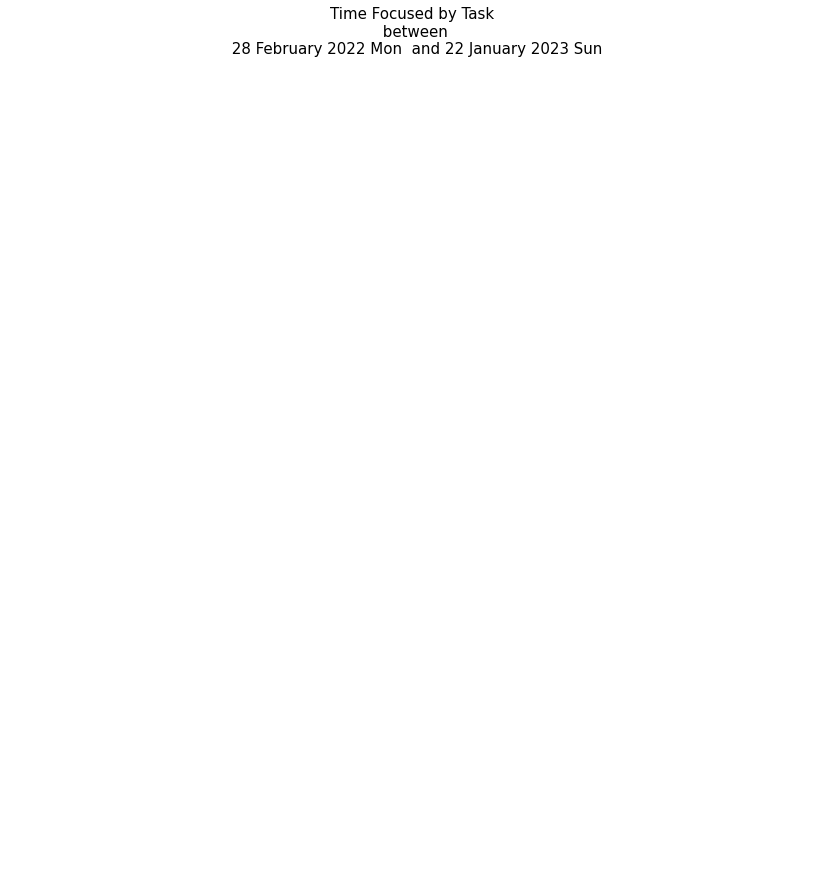

In [11]:
# create the pie chart using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
wedges, labels, autopct = ax.pie(pie_df['TIME FOCUSED'], 
                                 labels=pie_df['TASK'], 
                                 autopct='', 
                                 textprops={'fontsize': 15})

plt.setp(autopct, color='white', fontsize=15)

# add percentage and sum values to labels
sums = pie_df['TIME FOCUSED'].sum()
for index, row in pie_df.iterrows():
    task_time = row['TIME FOCUSED']
    task_label = row['TASK']
    label = autopct[index]
    label.set_text(f" {(task_time/sums)*100:.1f}% \n\n{int(task_time//60)} hours\n {int(task_time%60)} minutes")

strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')
ax.set_title(f"Time Focused by Task \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)


plt.show()

# Time focused by date 

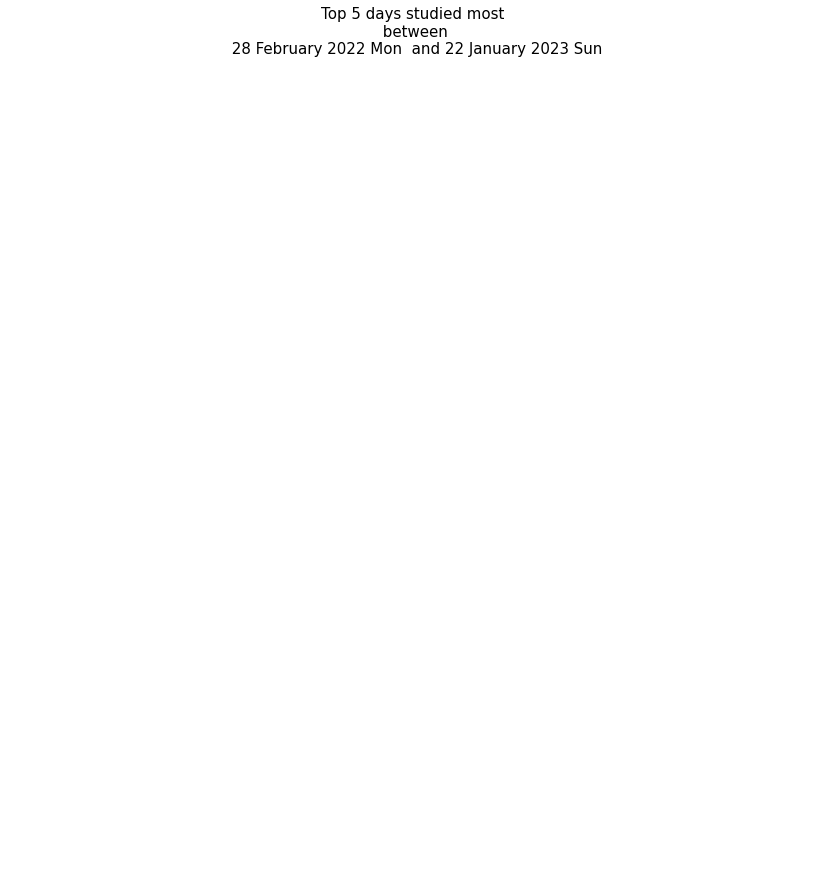

In [12]:
sort_date = data
# Group the data by task and sum the time focused
sort_date = sort_date.groupby('DATE')['TIME FOCUSED'].sum().reset_index()
sort_date =  sort_date.sort_values(by='TIME FOCUSED',ascending= False ).reset_index().head()
# sort the dataframe by Time Focused in descending order


    
# create the pie chart using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
wedges, labels, autopct = ax.pie(sort_date['TIME FOCUSED'], 
                                 labels=sort_date['DATE'].dt.strftime('%d %B %Y %a') , 
                                 autopct='', 
                                 textprops={'fontsize': 15})

plt.setp(autopct, color='white', fontsize=15)

# add percentage and sum values to labels
sums = sort_date['TIME FOCUSED'].sum()
for index, row in sort_date.iterrows():
    task_time = row['TIME FOCUSED']
    task_label = row['DATE']
    label = autopct[index]
    label.set_text(f" {(task_time/sums)*100:.1f}% \n\n{int(task_time//60)} hours\n {int(task_time%60)} minutes")

strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')
ax.set_title(f"Top 5 days studied most \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)


plt.show()

### MultiIndex

In [13]:
grpdf = data
grpdf = grpdf.groupby(['DATE','TASK'])['TIME FOCUSED'].sum().reset_index()

dates = grpdf['DATE']
tasks = grpdf['TASK']
times = grpdf['TIME FOCUSED'].values

arrays= [
    dates.to_numpy(),
    tasks.to_numpy(),
        ]
index = pd.MultiIndex.from_arrays(arrays,
                                  names=["date","task"])
dtf = pd.Series(times,index=index)
grpdf


,DATE,TASK,TIME FOCUSED


Unstack

In [14]:
unstacked_df = dtf.unstack()

unstacked_df =unstacked_df.fillna(0)
unstacked_df




task
date


## seaborn bar chart


In [15]:

sns_df = unstacked_df
top_days = input() or 10

max_dates = sns_df.sum(axis=1).nlargest(top_days).index
get_max = sns_df.loc[max_dates]
get_max = get_max.loc[:, (get_max != 0).any(axis=0)]
get_max.index = get_max.index.strftime('%d %B %Y %a')
sns.set(style='whitegrid')

ax = get_max.plot(kind='bar', stacked=True, figsize=(20, 10))
ax.set_xlabel('Date')
ax.set_ylabel('Time')
ax.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    value = f"{patch.get_height():.0f}"
    if patch.get_height() != 0:
        ax.text(x, y, value, ha='center', va='center', color='white')
ax.set_title(f"Top {len(max_dates)} days studied most \n between \n {strf_start_date}  and {strf_end_date}",fontsize=30)

plt.show()


add column 


In [ ]:

unstacked_df['total'] =  unstacked_df.sum(axis=1)

cols = unstacked_df.columns.tolist()

cols = [cols[-1]] + cols[:-1]
unstacked_df = unstacked_df[cols]
unstacked_df.head(30)
unstacked_df = unstacked_df.groupby(['total time'],
                                  level='date').sum()
unstacked_df= unstacked_df.sort_values(by='total',
                                       ascending= False ).reset_index().head(5)
unstacked_df

task,date,total,A weird problem ..,B & C,Bootstrap,CS885,Chinese,Data analysis,Documantation,Drone simulation,...,kuran,kurs,last day bc,lesson student,numberga.me,odtü,program,rebuidling,violin,web
0,2022-09-14,605.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455.0,0.0,0.0
1,2022-06-19,592.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-24,573.0,0.0,273.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-08-07,556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-08-19,545.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## classifying by day name 


In [ ]:
days_df = data 
days_df['DATE'] = days_df['DATE'].dt.day_name()


In [ ]:
days_df= days_df.groupby(['DATE','TASK'])['TIME FOCUSED'].sum()

In [ ]:
days_df.head(10)

DATE    TASK                          
Friday  B & C                              313.0
        Chinese                            425.0
        Eng revision                       175.0
        Game css                           175.0
        General                             25.0
        HTML, CSS, Flexbox & Bootstrap     125.0
        IELTS                               85.0
        Javascript                         728.0
        MATH 115                           100.0
        MATH 153                          1129.0
Name: TIME FOCUSED, dtype: float64

In [ ]:
days_sns = days_df.unstack().fillna(0)

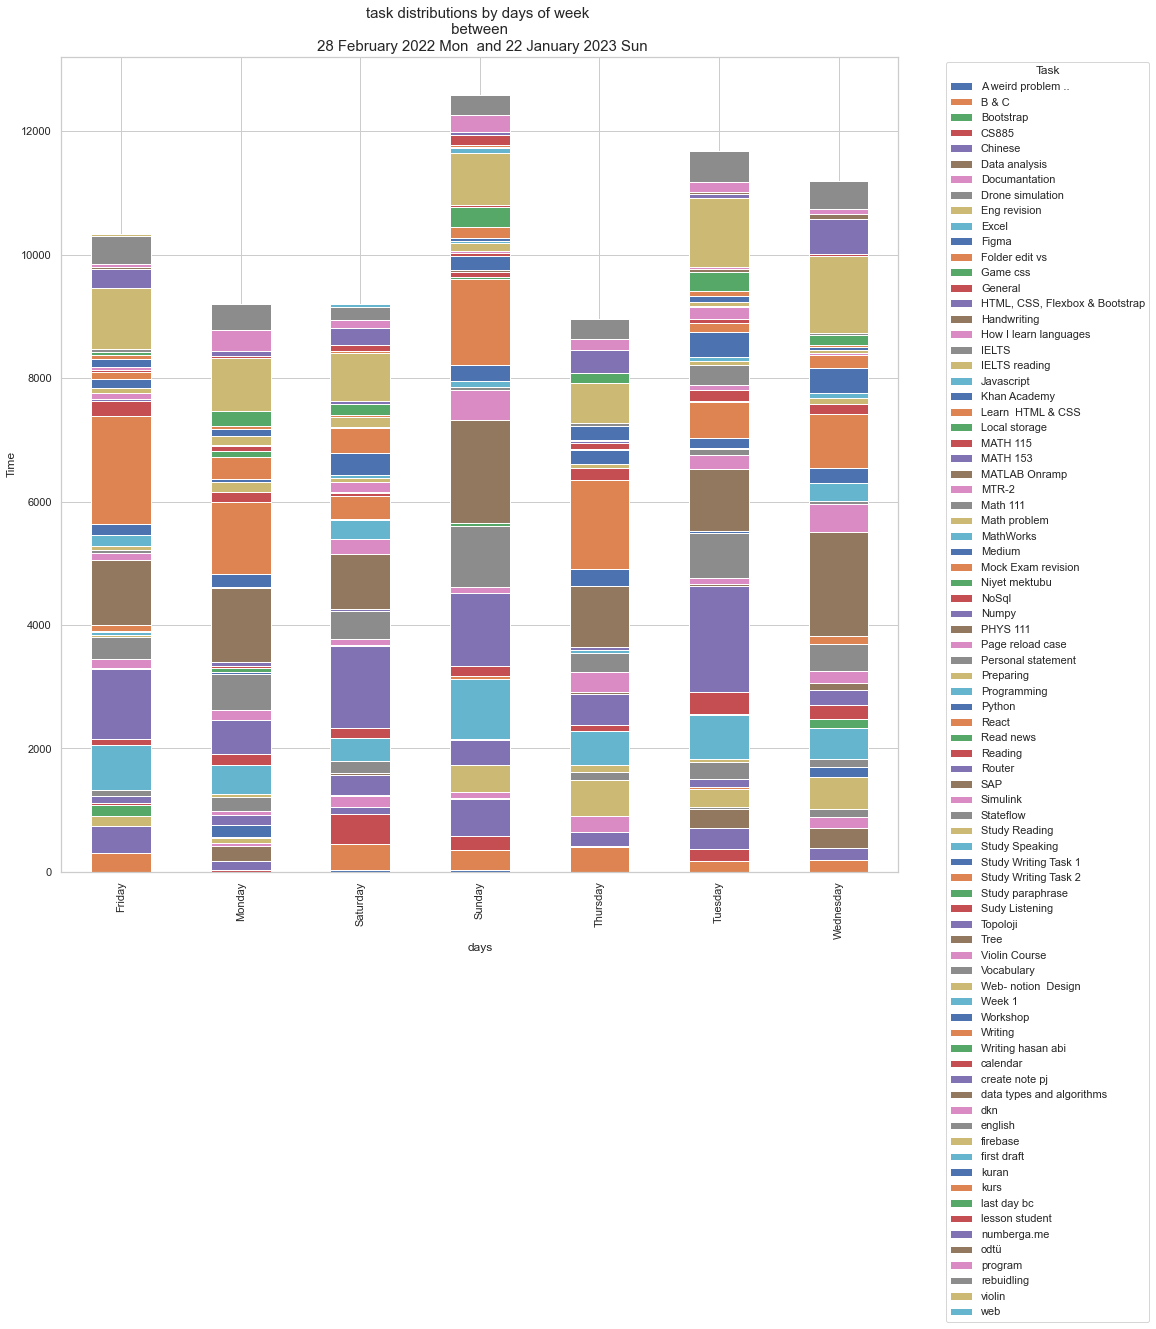

In [ ]:
max_dates = days_sns.sum(axis=1).index

get_max = days_sns.loc[max_dates]

# get nonzero columns
get_max = get_max.loc[:, (get_max != 0).any(axis=0)]
#get_max.index = get_max.index.strftime('%d %B %Y %a')

sns.set(style='whitegrid')

ax = get_max.plot(kind='bar', stacked=True, figsize=(15, 15))
ax.set_xlabel('days')
ax.set_ylabel('Time')
ax.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add values on each bar
# for patch in ax.patches:
#     x = patch.get_x() + patch.get_width() / 2
#     y = patch.get_y() + patch.get_height() / 2
#     value = f"{patch.get_height():.0f}"
#     if patch.get_height() != 0:
#         ax.text( x,y, value, ha='center', va='center', color='white')

ax.set_title(f"task distributions by days of week \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)
# Show the plot
plt.show()

In [ ]:


max_dates = days_sns.sum(axis=1).index
get_max = days_sns.loc[max_dates]
get_max = get_max.loc[:, (get_max != 0).any(axis=0)]

fig = go.Figure(data=[go.Bar(x=get_max.index, y=get_max[col], name=col) for col in get_max.columns])
fig.update_layout(barmode='stack', xaxis_title='Days', yaxis_title='Time',
                  title=f"Task distributions by days of week between {strf_start_date} and {strf_end_date}")
fig.update_layout(hovermode='x unified')
fig.show()